# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
df = pd.read_csv("/content/humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576532 entries, 0 to 576531
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    576532 non-null  int64  
 1   lat          576531 non-null  float64
 2   lon          576531 non-null  float64
 3   pressure     576531 non-null  float64
 4   temperature  576531 non-null  float64
 5   humidity     576531 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 26.4 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [7]:
# Check for missing values
df = df[['humidity', 'temperature']]
df.dropna(inplace=True)
# Display summary statistics
df = pd.read_csv("humidity.csv")
print(df.info())
print(df.head())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB
None
   sensor_id     lat     lon  pressure  temperature  humidity
0       2266  42.738  23.272  95270.27        23.46     62.48
1       2292  42.663  23.273  94355.83        23.06     59.46
2       3096  42.700  23.360  95155.81        26.53     44.38
3       3428  42.624  23.406  94679.57        28.34     38.28
4       3472  42.669  23.318  94327.88        26.31     46.37


,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


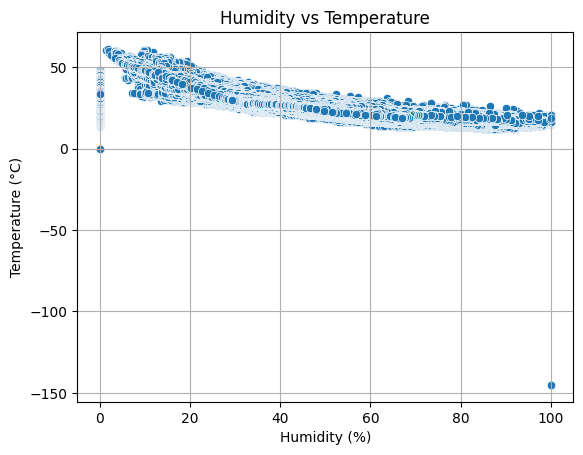


Correlation Matrix:
              humidity  temperature
humidity     1.000000    -0.507828
temperature -0.507828     1.000000


In [13]:
# Scatter plot to observe relationship
df = df[['humidity', 'temperature']]
df.dropna(inplace=True)
sns.scatterplot(data=df, x='humidity', y='temperature')
plt.title("Humidity vs Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

correlation = df.corr()
print("\nCorrelation Matrix:\n", correlation)

## Data Preprocessing

In [12]:
# Drop any rows with missing values
df.dropna(inplace=True)

# Define features and target
X = df[['humidity']]
y = df['temperature']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

In [14]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


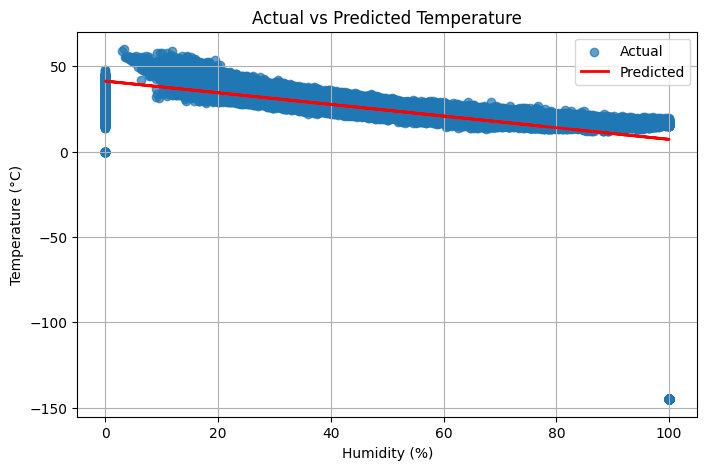

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label='Actual', alpha=0.7)
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

## Evaluation


In [15]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 144.08
R² Score: 0.26


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.


In [18]:
print("\nConclusion:\nA simple linear regression model was used to predict temperature from humidity.")
print("Consider using polynomial regression or time-series models for more complex patterns.")


Conclusion:
A simple linear regression model was used to predict temperature from humidity.
Consider using polynomial regression or time-series models for more complex patterns.
